In [1]:
from DBSCAN import *
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## 观察数据集
导入鸢尾花数据集，并将其可视化，观察数据的分布，也便于与训练后的结果做对比

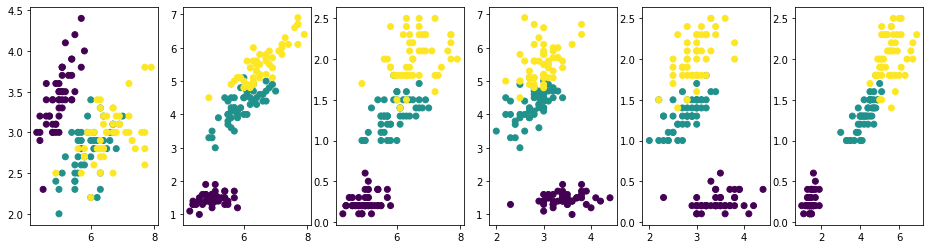

In [3]:
import itertools
iris = load_iris()
X = iris.data
y = iris.target
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
j=0
for i in list(itertools.combinations(range(4), 2)):
    axes[j].scatter(X[:,i[0]], X[:,i[1]], c=y)
    j+=1

## 训练
直接用DBSCAN的默认参数训练会怎样呢？

可以看到上图黄色和绿色全归为一个类了，效果很差

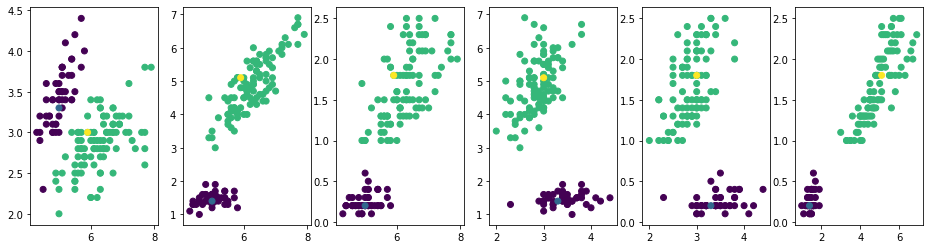

In [5]:
dc = DBSCAN()
res = dc.fit(X)
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
j=0
for i in list(itertools.combinations(range(4), 2)):
    axes[j].scatter(X[:,i[0]], X[:,i[1]], c=res)
    j+=1

## 调参
既然不行，那就手动调参吧！设最小半径为0.46，最大点数为9，训练结果如下

可以看出虽然比上面的好多了，但是依然有很多绿色的点被视为噪点，只能说勉强吧，个人感觉对于鸢尾花数据集来说，kmeans聚类更适合。

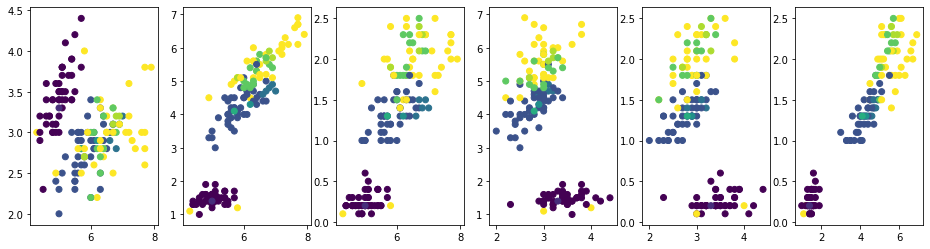

In [6]:
dc = DBSCAN(0.46, 9)
res = dc.fit(X)
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
j=0
for i in list(itertools.combinations(range(4), 2)):
    axes[j].scatter(X[:,i[0]], X[:,i[1]], c=res)
    j+=1

## 对比
与sklearn中的DBSCAN的进行对比

结果sklearn的比我的还差hhhh

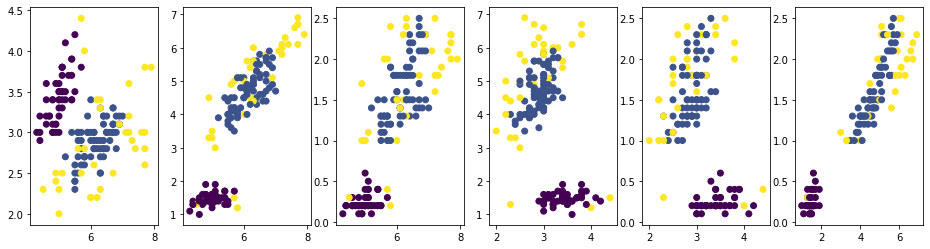

In [8]:
from sklearn.cluster import DBSCAN as DBSCAN_SK
dc = DBSCAN_SK(eps=0.46, min_samples=9)
dc.fit(X)
res = dc.labels_
res[res==-1] = 4
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
j=0
for i in list(itertools.combinations(range(4), 2)):
    axes[j].scatter(X[:,i[0]], X[:,i[1]], c=res)
    j+=1